### LANGKAH 1: PERSIAPAN AWAL (SETUP)

In [1]:
print("Mengimpor library yang diperlukan dan menyiapkan environment\n")

# Cek versi Python (minimal 3.5)
import sys
print(f"Versi Python: {sys.version}")
assert sys.version_info >= (3, 5), "Python 3.5 atau lebih tinggi diperlukan"

# Import library utama
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sklearn
from sklearn.datasets import fetch_openml

# Cek versi Scikit-Learn (minimal 0.20)
print(f"Versi Scikit-Learn: {sklearn.__version__}")
assert sklearn.__version__ >= "0.20", "Scikit-Learn 0.20 atau lebih tinggi diperlukan"

# Set random seed untuk hasil yang konsisten
np.random.seed(42)

# Konfigurasi matplotlib untuk plot yang lebih bagus
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

Mengimpor library yang diperlukan dan menyiapkan environment

Versi Python: 3.12.2 | packaged by conda-forge | (main, Feb 16 2024, 20:50:58) [GCC 12.3.0]
Versi Scikit-Learn: 1.6.1


### LANGKAH 2: MEMUAT DATASET MNIST

In [2]:
print("MNIST adalah dataset gambar angka tulisan tangan 0-9")
print("Setiap gambar berukuran 28x28 piksel (784 fitur)\n")

# Memuat dataset MNIST dari OpenML
# as_frame=False untuk menghindari DataFrame pandas
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
print("Dataset MNIST berhasil dimuat!\n")
print(f"Keys yang tersedia: {list(mnist.keys())}")

# Memisahkan data (X) dan label (y)
X, y = mnist["data"], mnist["target"]
print(f"Bentuk data X: {X.shape}")  # (70000, 784)
print(f"Bentuk label y: {y.shape}")  # (70000,)
print(f"Setiap gambar memiliki {28 * 28} = {28*28} piksel")

# Mengkonversi label ke integer
y = y.astype(np.uint8)
print(f"Label pertama: {y[0]} (tipe: {type(y[0])})")

MNIST adalah dataset gambar angka tulisan tangan 0-9
Setiap gambar berukuran 28x28 piksel (784 fitur)

Dataset MNIST berhasil dimuat!

Keys yang tersedia: ['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url']
Bentuk data X: (70000, 784)
Bentuk label y: (70000,)
Setiap gambar memiliki 784 = 784 piksel
Label pertama: 5 (tipe: <class 'numpy.uint8'>)


### LANGKAH 3: VISUALISASI DATA

Melihat seperti apa gambar angka dalam dataset



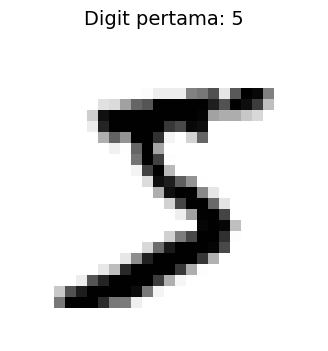

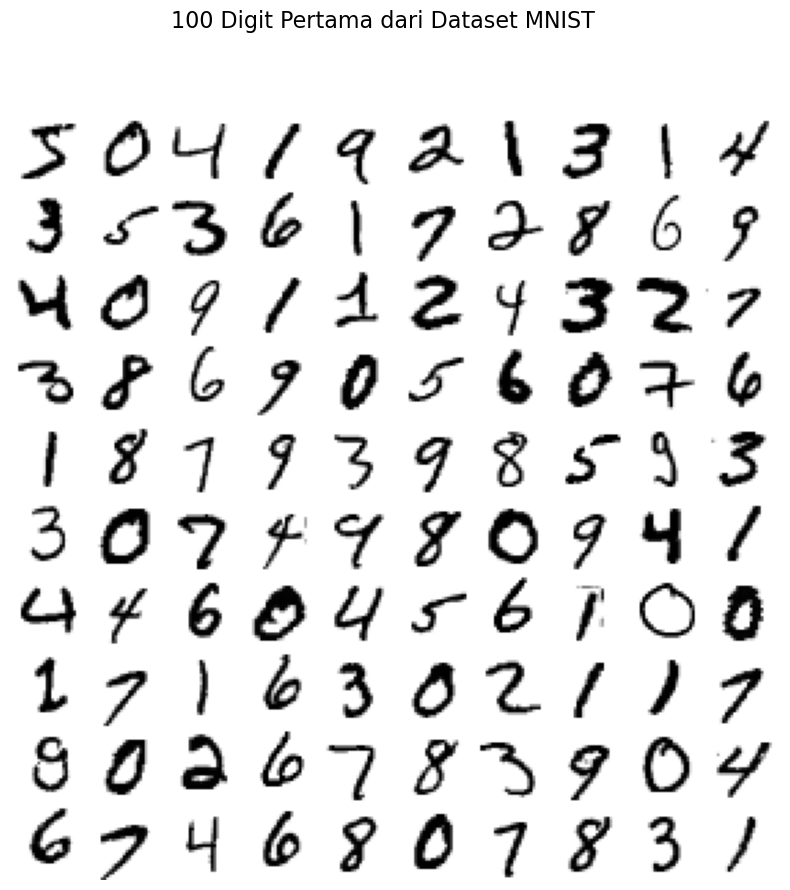

In [3]:
print("Melihat seperti apa gambar angka dalam dataset\n")

# Fungsi untuk menggambar satu digit
def plot_digit(data, title=""):
    """Menggambar satu digit dari array 784 elemen"""
    image = data.reshape(28, 28)
    plt.imshow(image, cmap=mpl.cm.binary, interpolation="nearest")
    plt.axis("off")
    if title:
        plt.title(title, fontsize=14)

# Fungsi untuk menggambar beberapa digit sekaligus
def plot_digits(instances, images_per_row=10, **options):
    """Menggambar beberapa digit dalam bentuk grid"""
    size = 28
    images_per_row = min(len(instances), images_per_row)
    n_rows = (len(instances) - 1) // images_per_row + 1
    
    # Tambahkan gambar kosong jika perlu untuk mengisi grid
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)
    
    # Reshape menjadi grid gambar
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))
    
    # Gabungkan axes untuk membuat gambar besar
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size, images_per_row * size)
    
    plt.imshow(big_image, cmap=mpl.cm.binary, **options)
    plt.axis("off")

# Tampilkan satu digit pertama
some_digit = X[0]
plt.figure(figsize=(4, 4))
plot_digit(some_digit, f"Digit pertama: {y[0]}")
plt.show()

# Tampilkan 100 digit pertama
plt.figure(figsize=(10, 10))
example_images = X[:100]
plot_digits(example_images, images_per_row=10)
plt.suptitle("100 Digit Pertama dari Dataset MNIST", fontsize=16)
plt.show()

### LANGKAH 4: MEMBAGI DATA TRAINING DAN TESTING

In [4]:
print("Dataset MNIST sudah terurut, 60.000 pertama untuk training, 10.000 sisanya untuk testing\n")

# Dataset MNIST sudah terurut: 60k training, 10k testing
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

print(f"Data training: {X_train.shape[0]} sampel")
print(f"Data testing: {X_test.shape[0]} sampel")

Dataset MNIST sudah terurut, 60.000 pertama untuk training, 10.000 sisanya untuk testing

Data training: 60000 sampel
Data testing: 10000 sampel


### LANGKAH 5: KLASIFIKASI BINER (BINARY CLASSIFICATION)

In [5]:
print("Klasifikasi biner: apakah angka = 5 atau bukan?\n")

# Membuat target biner: True jika angka 5, False jika bukan
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

print(f"Jumlah angka 5 dalam training: {sum(y_train_5)} dari {len(y_train_5)}")
print(f"Persentase angka 5: {sum(y_train_5)/len(y_train_5)*100:.1f}%")

# Menggunakan SGD Classifier (Stochastic Gradient Descent)
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_5)

print("Model SGD Classifier berhasil dilatih!")

# Test prediksi pada digit pertama
prediction = sgd_clf.predict([some_digit])
print(f"Prediksi untuk digit pertama (angka {y[0]}): {'adalah 5' if prediction[0] else 'bukan 5'}")

Klasifikasi biner: apakah angka = 5 atau bukan?

Jumlah angka 5 dalam training: 5421 dari 60000
Persentase angka 5: 9.0%
Model SGD Classifier berhasil dilatih!
Prediksi untuk digit pertama (angka 5): adalah 5


### LANGKAH 6: EVALUASI PERFORMA - CROSS VALIDATION

In [6]:
print("Cross validation membagi data training menjadi beberapa fold untuk evaluasi yang lebih robust\n")

from sklearn.model_selection import cross_val_score

# Evaluasi akurasi dengan 3-fold cross validation
cv_scores = cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")
print(f"Akurasi Cross Validation: {cv_scores}")
print(f"Akurasi rata-rata: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Bandingkan dengan classifier yang selalu prediksi "bukan 5"
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    """Classifier yang selalu memprediksi 'bukan 5'"""
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()
never_cv_scores = cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")
print(f"Akurasi 'Never 5' classifier: {never_cv_scores.mean():.4f}")

Cross validation membagi data training menjadi beberapa fold untuk evaluasi yang lebih robust

Akurasi Cross Validation: [0.95035 0.96035 0.9604 ]
Akurasi rata-rata: 0.9570 ± 0.0047
Akurasi 'Never 5' classifier: 0.9096


### LANGKAH 7: CONFUSION MATRIX

Dari confusion matrix bisa menurunkan metrik ke yang lebih informatif:

Precision: Akurasi dari prediksi positif. $Precision= (TP+FP)/TP$
​
 
Recall (Sensitivity): Rasio dari instance positif yang berhasil dideteksi. $Recall= (TP+FN)/TP$

Confusion matrix untuk menunjukkan detail prediksi yang benar dan salah

Confusion Matrix:
[[53892   687]
 [ 1891  3530]]

Interpretasi:
True Negatives (TN): 53892 - Benar prediksi 'bukan 5'
False Positives (FP): 687 - Salah prediksi 'adalah 5'
False Negatives (FN): 1891 - Salah prediksi 'bukan 5'
True Positives (TP): 3530 - Benar prediksi 'adalah 5'


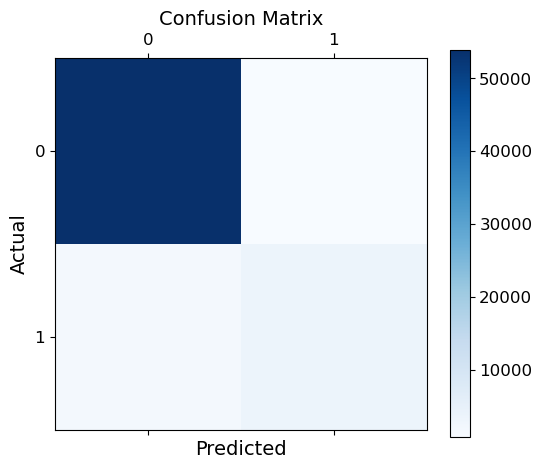

In [7]:
print("Confusion matrix untuk menunjukkan detail prediksi yang benar dan salah\n")

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# Dapatkan prediksi untuk seluruh training set menggunakan cross validation
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

# Hitung confusion matrix
conf_mx = confusion_matrix(y_train_5, y_train_pred)
print("Confusion Matrix:")
print(conf_mx)
print()

# Interpretasi confusion matrix
tn, fp, fn, tp = conf_mx.ravel()
print("Interpretasi:")
print(f"True Negatives (TN): {tn} - Benar prediksi 'bukan 5'")
print(f"False Positives (FP): {fp} - Salah prediksi 'adalah 5'") 
print(f"False Negatives (FN): {fn} - Salah prediksi 'bukan 5'")
print(f"True Positives (TP): {tp} - Benar prediksi 'adalah 5'")

# Visualisasi confusion matrix
plt.figure(figsize=(6, 5))
plt.matshow(conf_mx, cmap=plt.cm.Blues, fignum=1)
plt.colorbar()
plt.title("Confusion Matrix", fontsize=14)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### LANGKAH 8: PRECISION DAN RECAL

In [8]:
print("Precision: Dari semua prediksi positif, berapa yang benar?")
print("Recall: Dari semua kasus positif actual, berapa yang berhasil ditangkap?\n")

from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_train_5, y_train_pred)
recall = recall_score(y_train_5, y_train_pred)
f1 = f1_score(y_train_5, y_train_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")  
print(f"F1-Score: {f1:.4f}")

# Hitung manual untuk verifikasi
precision_manual = tp / (tp + fp)
recall_manual = tp / (tp + fn)
f1_manual = 2 * precision_manual * recall_manual / (precision_manual + recall_manual)

print(f"\nVerifikasi manual dengan rumus:")
print(f"Precision manual: {precision_manual:.4f}")
print(f"Recall manual: {recall_manual:.4f}")
print(f"F1-Score manual: {f1_manual:.4f}")

Precision: Dari semua prediksi positif, berapa yang benar?
Recall: Dari semua kasus positif actual, berapa yang berhasil ditangkap?

Precision: 0.8371
Recall: 0.6512
F1-Score: 0.7325

Verifikasi manual dengan rumus:
Precision manual: 0.8371
Recall manual: 0.6512
F1-Score manual: 0.7325


### LANGKAH 9: PRECISION/RECALL TRADE-OFF

Dengan mengubah threshold, bisa mengatur trade-off antara precision dan recall



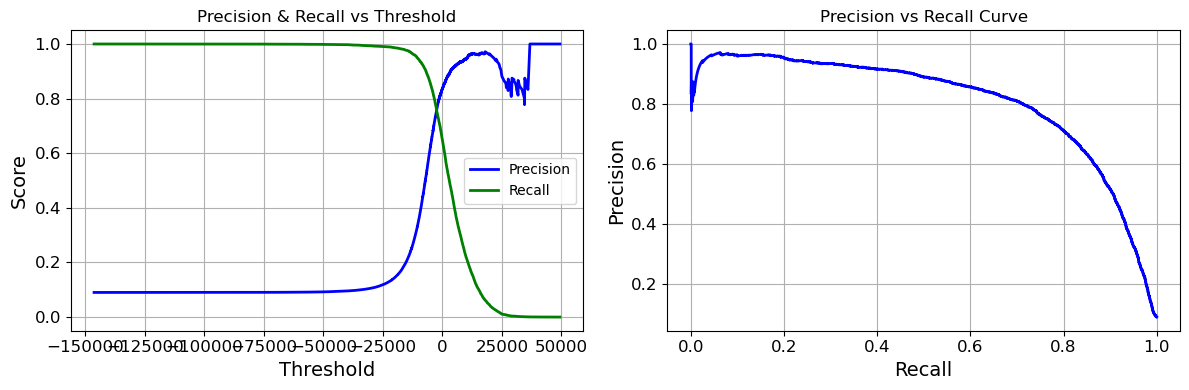

Threshold untuk precision 90%: 3370.0
Dengan threshold 3370.0:
Precision: 0.900
Recall: 0.480


In [9]:
print("Dengan mengubah threshold, bisa mengatur trade-off antara precision dan recall\n")

from sklearn.metrics import precision_recall_curve

# Dapatkan decision scores untuk semua sampel training
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

# Hitung precision dan recall untuk berbagai threshold
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

# Plot precision vs recall curve
plt.figure(figsize=(12, 4))

# Plot 1: Precision dan Recall vs Threshold
plt.subplot(1, 2, 1)
plt.plot(thresholds, precisions[:-1], "b-", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.title("Precision & Recall vs Threshold")

# Plot 2: Precision vs Recall
plt.subplot(1, 2, 2)
plt.plot(recalls, precisions, "b-", linewidth=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)
plt.title("Precision vs Recall Curve")

plt.tight_layout()
plt.show()

# Cari threshold untuk precision 90%
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
print(f"Threshold untuk precision 90%: {threshold_90_precision:.1f}")

# Prediksi dengan threshold tinggi
y_train_pred_90 = (y_scores >= threshold_90_precision)
precision_90 = precision_score(y_train_5, y_train_pred_90)
recall_90 = recall_score(y_train_5, y_train_pred_90)

print(f"Dengan threshold {threshold_90_precision:.1f}:")
print(f"Precision: {precision_90:.3f}")
print(f"Recall: {recall_90:.3f}")

### LANGKAH 10: ROC CURVE

Kurva Receiver Operating Characteristic (ROC) adalah alat lain untuk mengevaluasi binary classifier. Kurva ini memplot True Positive Rate (TPR, alias Recall) terhadap False Positive Rate (FPR). FPR adalah rasio instance negatif yang salah diklasifikasikan sebagai positif 

$FPR = (FP+TN)/FP$

ROC Curve menunjukkan trade-off antara True Positive Rate dan False Positive Rate



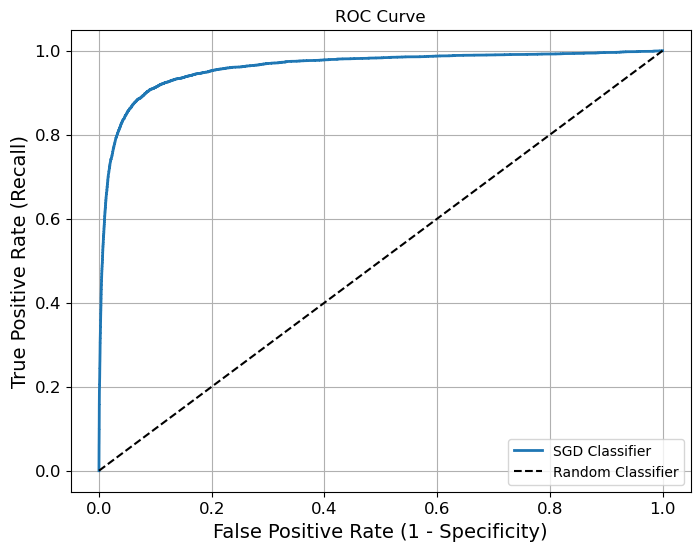

AUC Score: 0.9605
AUC = 0.5 berarti random classifier
AUC = 1.0 berarti perfect classifier


In [10]:
print("ROC Curve menunjukkan trade-off antara True Positive Rate dan False Positive Rate\n")

from sklearn.metrics import roc_curve, roc_auc_score

# Hitung ROC curve
fpr, tpr, roc_thresholds = roc_curve(y_train_5, y_scores)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2, label="SGD Classifier")
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# Hitung AUC (Area Under Curve)
auc_score = roc_auc_score(y_train_5, y_scores)
print(f"AUC Score: {auc_score:.4f}")
print("AUC = 0.5 berarti random classifier")
print("AUC = 1.0 berarti perfect classifier")

### LANGKAH 11: PERBANDINGAN DENGAN RANDOM FOREST

Membandingkan SGD dengan Random Forest Classifier



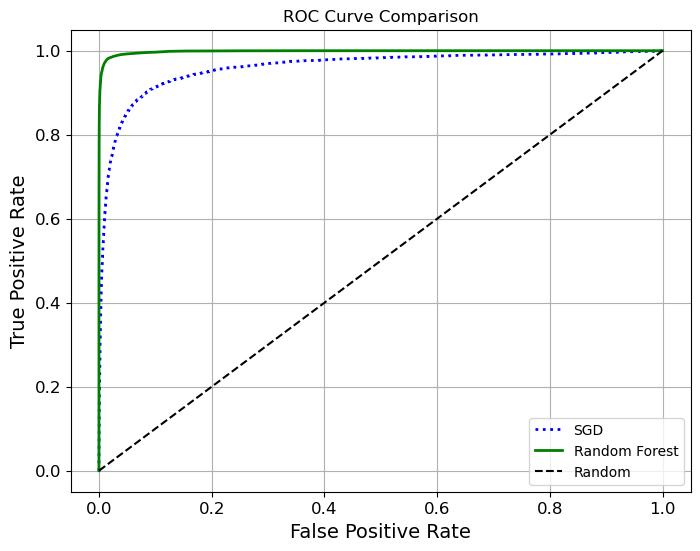

AUC SGD: 0.9605
AUC Random Forest: 0.9983

Perbandingan Precision & Recall:
SGD - Precision: 0.837, Recall: 0.651
Random Forest - Precision: 0.991, Recall: 0.866


In [11]:
print("Membandingkan SGD dengan Random Forest Classifier\n")

from sklearn.ensemble import RandomForestClassifier

# Latih Random Forest
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

# Gunakan probabilitas kelas positif sebagai score
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, _ = roc_curve(y_train_5, y_scores_forest)

# Plot perbandingan ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plt.plot(fpr_forest, tpr_forest, "g-", linewidth=2, label="Random Forest")
plt.plot([0, 1], [0, 1], 'k--', label="Random")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()

# Bandingkan AUC scores
auc_forest = roc_auc_score(y_train_5, y_scores_forest)
print(f"AUC SGD: {auc_score:.4f}")
print(f"AUC Random Forest: {auc_forest:.4f}")

# Bandingkan precision dan recall
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_forest = precision_score(y_train_5, y_train_pred_forest)
recall_forest = recall_score(y_train_5, y_train_pred_forest)

print(f"\nPerbandingan Precision & Recall:")
print(f"SGD - Precision: {precision:.3f}, Recall: {recall:.3f}")
print(f"Random Forest - Precision: {precision_forest:.3f}, Recall: {recall_forest:.3f}")

### LANGKAH 12: MULTICLASS CLASSIFICATION

In [12]:
print("Mengklasifikasikan semua 10 digit (0-9)\n")

# SGD secara otomatis menggunakan One-vs-Rest untuk multiclass
sgd_clf_multi = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf_multi.fit(X_train, y_train)

# Test prediksi
some_digit_pred = sgd_clf_multi.predict([some_digit])
print(f"Prediksi untuk digit pertama: {some_digit_pred[0]} (sebenarnya: {y[0]})")

# Lihat confidence scores untuk semua kelas
some_digit_scores = sgd_clf_multi.decision_function([some_digit])
print(f"Confidence scores untuk semua kelas: {some_digit_scores}")
print(f"Kelas dengan score tertinggi: {np.argmax(some_digit_scores)}")

# Evaluasi akurasi multiclass
multiclass_scores = cross_val_score(sgd_clf_multi, X_train, y_train, cv=3, scoring="accuracy")
print(f"\nAkurasi Multiclass: {multiclass_scores.mean():.4f} ± {multiclass_scores.std():.4f}")

Mengklasifikasikan semua 10 digit (0-9)

Prediksi untuk digit pertama: 3 (sebenarnya: 5)
Confidence scores untuk semua kelas: [[-31893.03095419 -34419.69069632  -9530.63950739   1823.73154031
  -22320.14822878  -1385.80478895 -26188.91070951 -16147.51323997
   -4604.35491274 -12050.767298  ]]
Kelas dengan score tertinggi: 3

Akurasi Multiclass: 0.8670 ± 0.0064


### LANGKAH 13: SCALING DAN PENINGKATAN PERFORMA

In [13]:
print("Scaling fitur dapat meningkatkan performa algoritma berbasis gradient\n")

from sklearn.preprocessing import StandardScaler

# Scaling fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

# Evaluasi dengan data yang sudah discale
scaled_scores = cross_val_score(sgd_clf_multi, X_train_scaled, y_train, cv=3, scoring="accuracy")
print(f"Akurasi tanpa scaling: {multiclass_scores.mean():.4f}")
print(f"Akurasi dengan scaling: {scaled_scores.mean():.4f}")
print(f"Peningkatan: {scaled_scores.mean() - multiclass_scores.mean():.4f}")

Scaling fitur dapat meningkatkan performa algoritma berbasis gradient

Akurasi tanpa scaling: 0.8670
Akurasi dengan scaling: 0.8970
Peningkatan: 0.0301


### LANGKAH 14: ERROR ANALYSIS

Analisis kesalahan (error) yang dibuat model dengan confusion matrix

Confusion Matrix 10x10:
[[5577    0   22    5    8   43   36    6  225    1]
 [   0 6400   37   24    4   44    4    7  212   10]
 [  27   27 5220   92   73   27   67   36  378   11]
 [  22   17  117 5227    2  203   27   40  403   73]
 [  12   14   41    9 5182   12   34   27  347  164]
 [  27   15   30  168   53 4444   75   14  535   60]
 [  30   15   42    3   44   97 5552    3  131    1]
 [  21   10   51   30   49   12    3 5684  195  210]
 [  17   63   48   86    3  126   25   10 5429   44]
 [  25   18   30   64  118   36    1  179  371 5107]]


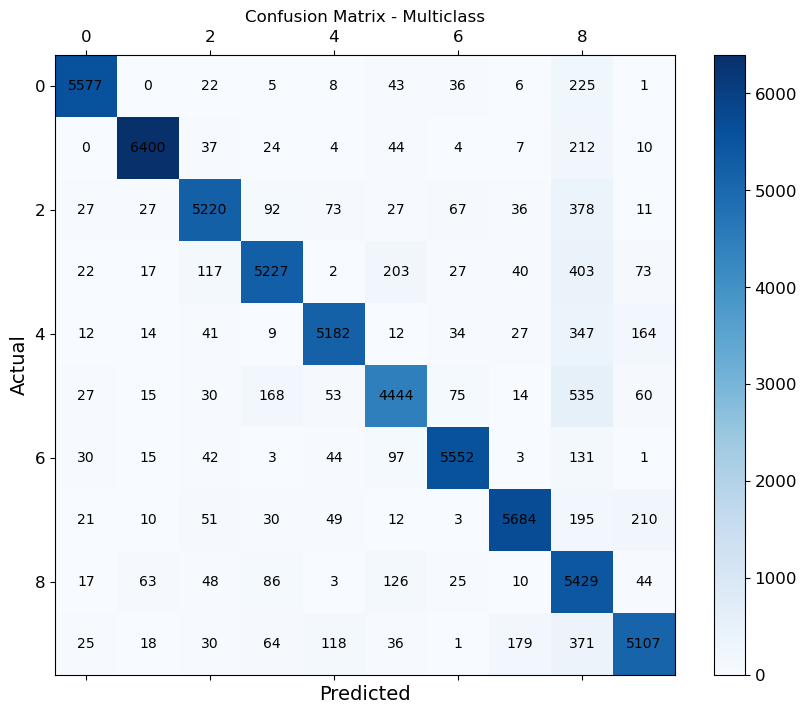

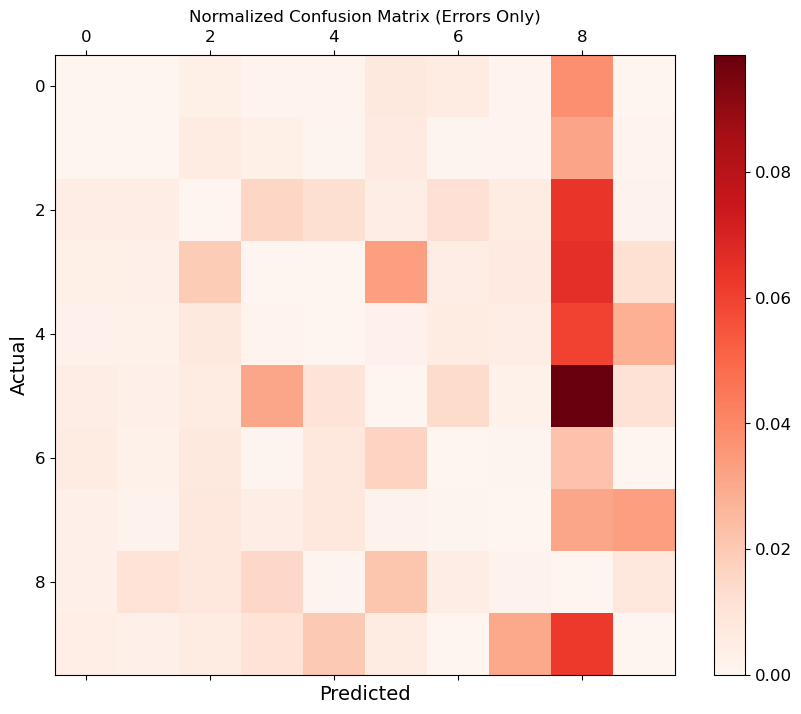

Error terbesar: Digit 5 diprediksi sebagai 8
Error rate: 0.099


In [14]:
print("Analisis kesalahan (error) yang dibuat model dengan confusion matrix\n")

# Prediksi dengan data scaled
y_train_pred_scaled = cross_val_predict(sgd_clf_multi, X_train_scaled, y_train, cv=3)

# Confusion matrix untuk multiclass
conf_mx_multi = confusion_matrix(y_train, y_train_pred_scaled)
print("Confusion Matrix 10x10:")
print(conf_mx_multi)

# Visualisasi confusion matrix
plt.figure(figsize=(10, 8))
plt.matshow(conf_mx_multi, cmap=plt.cm.Blues, fignum=1)
plt.colorbar()
plt.title("Confusion Matrix - Multiclass")
plt.xlabel("Predicted")
plt.ylabel("Actual")
for i in range(10):
    for j in range(10):
        plt.text(j, i, str(conf_mx_multi[i, j]), ha='center', va='center')
plt.show()

# Normalisasi confusion matrix untuk melihat error rate
row_sums = conf_mx_multi.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx_multi / row_sums

# Set diagonal ke 0 untuk fokus pada errors
np.fill_diagonal(norm_conf_mx, 0)

plt.figure(figsize=(10, 8))
plt.matshow(norm_conf_mx, cmap=plt.cm.Reds, fignum=1)
plt.colorbar()
plt.title("Normalized Confusion Matrix (Errors Only)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Cari pasangan digit yang paling sering salah diklasifikasi
max_error_idx = np.unravel_index(np.argmax(norm_conf_mx), norm_conf_mx.shape)
print(f"Error terbesar: Digit {max_error_idx[0]} diprediksi sebagai {max_error_idx[1]}")
print(f"Error rate: {norm_conf_mx[max_error_idx]:.3f}")

### LANGKAH 15: Klasifikasi Multilabel (Multilabel Classification)
Terkadang kita ingin classifier mengeluarkan beberapa label untuk setiap instance. Contohnya: mengidentifikasi beberapa orang dalam sebuah foto. Dalam contoh ini, kita akan membuat dua label untuk setiap digit:

- Apakah angkanya besar? (≥ 7)
- Apakah angkanya ganjil?

Membuat classifier multilabel menggunakan KNeighborsClassifier

Contoh 5 label pertama:
Digit 5: besar=False, ganjil=True
Digit 0: besar=False, ganjil=False
Digit 4: besar=False, ganjil=False
Digit 1: besar=False, ganjil=True
Digit 9: besar=True, ganjil=True

Melatih model KNeighborsClassifier...
Model selesai dilatih.

Mengevaluasi model dengan cross-validation (ini mungkin butuh waktu)...
Macro F1-Score (cross-val): 0.976

Prediksi untuk 5 digit pertama dari test set:
Digit 7:
- Prediksi Besar (>=7)? Ya
- Prediksi Ganjil? Ya
Digit 2:
- Prediksi Besar (>=7)? Tidak
- Prediksi Ganjil? Tidak
Digit 1:
- Prediksi Besar (>=7)? Tidak
- Prediksi Ganjil? Ya
Digit 0:
- Prediksi Besar (>=7)? Tidak
- Prediksi Ganjil? Tidak
Digit 4:
- Prediksi Besar (>=7)? Tidak
- Prediksi Ganjil? Tidak


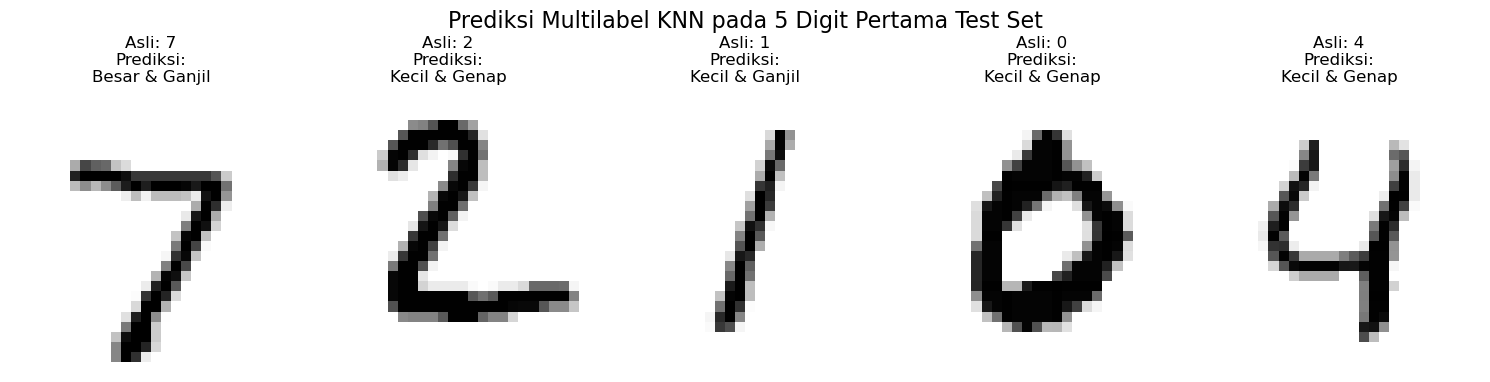

In [15]:
print("Membuat classifier multilabel menggunakan KNeighborsClassifier\n")

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt

# LANGKAH 1: Membuat target multilabel
# Label pertama: True jika digit >= 7 (Besar)
# Label kedua: True jika digit ganjil (Ganjil)
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

print("Contoh 5 label pertama:")
for i in range(5):
   print(f"Digit {y_train[i]}: besar={y_multilabel[i,0]}, ganjil={y_multilabel[i,1]}")

# LANGKAH 2: Melatih model KNeighborsClassifier
# KNN mendukung multilabel classification secara langsung.
# Catatan: Berbeda dengan SGD, pada contoh ini kita tidak menggunakan scaling.
print("\nMelatih model KNeighborsClassifier...")
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)
print("Model selesai dilatih.")


# LANGKAH 3: Evaluasi performa dengan F1-Score
# Peringatan: Proses cross-validation dengan KNN pada dataset besar bisa memakan waktu cukup lama.
print("\nMengevaluasi model dengan cross-validation (ini mungkin butuh waktu)...")
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)

# Hitung F1-score rata-rata untuk semua label
f1 = f1_score(y_multilabel, y_train_knn_pred, average="macro")
print(f"Macro F1-Score (cross-val): {f1:.3f}")


# LANGKAH 4: Test prediksi dan visualisasi
print(f"\nPrediksi untuk 5 digit pertama dari test set:")
predictions = knn_clf.predict(X_test[:5])
for i in range(5):
   print(f"Digit {y_test[i]}:")
   print(f"- Prediksi Besar (>=7)? {'Ya' if predictions[i][0] else 'Tidak'}")
   print(f"- Prediksi Ganjil? {'Ya' if predictions[i][1] else 'Tidak'}")


# Visualisasi beberapa prediksi pada test set
plt.figure(figsize=(15, 4))
plt.suptitle("Prediksi Multilabel KNN pada 5 Digit Pertama Test Set", fontsize=16)
for index, (image, pred, true_digit) in enumerate(zip(X_test[:5], predictions, y_test[:5])):
   plt.subplot(1, 5, index + 1)
   plt.imshow(image.reshape(28, 28), cmap=plt.cm.binary)
   plt.axis('off')
   pred_large = "Besar" if pred[0] else "Kecil"
   pred_odd = "Ganjil" if pred[1] else "Genap"
   plt.title(f"Asli: {true_digit}\nPrediksi:\n{pred_large} & {pred_odd}")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### LANGKAH 16: Klasifikasi Multioutput (Multioutput Classification)
Ini adalah generalisasi dari klasifikasi multilabel di mana setiap label bisa multikelas. Contoh yang bagus adalah membuat sistem yang membersihkan noise dari gambar. Inputnya adalah gambar digit yang ber-noise, dan outputnya adalah gambar digit yang bersih (labelnya adalah array piksel).

Membuat sistem pembersih noise dari gambar digit menggunakan KNN Multioutput

Menambahkan noise ke dataset...
Melatih model KNeighborsClassifier...
Model selesai dilatih.

Membersihkan noise dari gambar test dan menampilkan hasilnya...


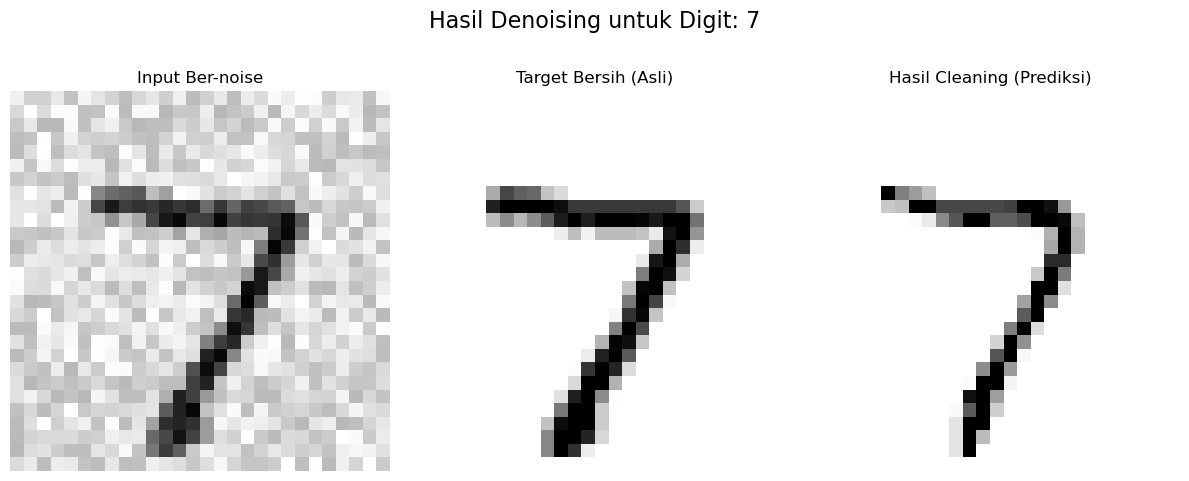

In [16]:
print("Membuat sistem pembersih noise dari gambar digit menggunakan KNN Multioutput\n")

# LANGKAH 1: Membuat data noisy
# Menambahkan noise acak ke setiap gambar di training dan test set.
print("Menambahkan noise ke dataset...")
noise_train = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise_train

noise_test = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise_test

# Targetnya adalah gambar asli yang bersih
y_train_mod = X_train
y_test_mod = X_test

# LANGKAH 2: Melatih model KNN
# Model akan belajar memetakan dari gambar noisy (X_train_mod) ke gambar bersih (y_train_mod)
print("Melatih model KNeighborsClassifier...")
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)
print("Model selesai dilatih.")

# LANGKAH 3: Membersihkan gambar test dan memvisualisasikan hasilnya
print("\nMembersihkan noise dari gambar test dan menampilkan hasilnya...")

# Pilih satu gambar dari test set untuk dibersihkan
some_index = 0
some_noisy_digit = X_test_mod[some_index]

# Lakukan prediksi untuk membersihkan noise
clean_digit = knn_clf.predict([some_noisy_digit])

# Siapkan plot untuk perbandingan
plt.figure(figsize=(12, 5))
plt.suptitle(f"Hasil Denoising untuk Digit: {y_test[some_index]}", fontsize=16)

# Gambar noisy (input)
plt.subplot(1, 3, 1)
plot_digit(some_noisy_digit)
plt.title("Input Ber-noise")

# Gambar bersih (target asli)
plt.subplot(1, 3, 2)
plot_digit(y_test_mod[some_index])
plt.title("Target Bersih (Asli)")

# Gambar hasil cleaning (output model)
plt.subplot(1, 3, 3)
plot_digit(clean_digit)
plt.title("Hasil Cleaning (Prediksi)")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

---

# Penjelasan

Notebook ini memandu proses klasifikasi gambar angka tulisan tangan dari dataset **MNIST** menggunakan berbagai teknik **machine learning**. Proses dimulai dari **persiapan data**, klasifikasi biner sederhana, evaluasi performa dengan berbagai metrik, hingga klasifikasi lebih kompleks seperti **multiclass, multilabel, dan multioutput**.

---

##  LANGKAH 1 & 2: Persiapan Awal dan Memuat Dataset MNIST
**Penjelasan:**
- Mengimpor library yang diperlukan seperti `numpy`, `matplotlib`, dan `scikit-learn`.
- Memuat dataset **MNIST** yang berisi **70.000 gambar angka tulisan tangan** (0-9).
- Setiap gambar berukuran **28x28 piksel**, direpresentasikan sebagai **784 fitur** (piksel).

**Kesimpulan:**
- Dataset berhasil dimuat dengan **70.000 sampel**.
- Data (`X`) dan label (`y`) berhasil dipisahkan.
- Label angka telah dikonversi ke format **integer** agar dapat diproses oleh model.

---

##  LANGKAH 3: Visualisasi Data
**Penjelasan:**
- Menampilkan beberapa sampel gambar agar lebih memahami data.
- Membuat fungsi untuk menampilkan **satu gambar digit** dan **grid 10x10** dengan 100 digit pertama.

**Kesimpulan:**
- **Gambar pertama** menunjukkan angka "5", sesuai dengan label yang diperiksa sebelumnya.
- **Gambar grid 10x10** menunjukkan variasi gaya tulisan tangan dalam dataset.
- Visualisasi ini penting untuk memahami tantangan klasifikasi angka tulisan tangan.

---

##  LANGKAH 4: Membagi Data Training dan Testing
**Penjelasan:**
- Dataset **MNIST sudah terurut**, sehingga harus dibagi secara manual.
- **60.000 gambar pertama** digunakan untuk pelatihan (**training set**).
- **10.000 gambar sisanya** digunakan untuk pengujian (**testing set**).

**Kesimpulan:**
- Dataset terbagi dengan benar (**60.000 data training, 10.000 data testing**).
- Pemisahan ini krusial untuk **evaluasi model yang objektif**.

---

##  LANGKAH 5: Klasifikasi Biner (Angka '5' atau Bukan)
**Penjelasan:**
- Masalah klasifikasi disederhanakan menjadi **deteksi angka '5' atau bukan**.
- Model **SGDClassifier (Stochastic Gradient Descent)** dilatih untuk tugas ini.

**Kesimpulan:**
- Model berhasil mendeteksi bahwa **digit pertama adalah "5"**.
- Hanya **9.0% dari data training** adalah angka '5' → dataset **imbalanced**.
- **Metrik akurasi saja tidak cukup** untuk evaluasi karena ketidakseimbangan data.

---

##  LANGKAH 6: Evaluasi dengan Cross-Validation
**Penjelasan:**
- Menggunakan **3-fold cross-validation** untuk evaluasi lebih akurat.
- Membandingkan model dengan **classifier "bodoh"** yang selalu menebak "bukan 5".

**Kesimpulan:**
- **SGDClassifier mencapai akurasi rata-rata 95.7%**.
- **Classifier "bodoh" mencapai akurasi 91.0%**, membuktikan bahwa **akurasi bukan metrik terbaik**.
- Model tampak akurat, tetapi sebagian besar keberhasilannya hanya karena mampu **menebak kelas mayoritas** dengan benar.

---

##  LANGKAH 7: Confusion Matrix
**Penjelasan:**
- Membuat **confusion matrix** untuk memahami kesalahan klasifikasi model.

**Kesimpulan:**
- Model mendeteksi **3.530 angka '5' dengan benar**, tetapi **melewatkan 1.891 angka '5'** (false negatives).
- **687 digit lain salah diklasifikasikan sebagai angka '5'** (false positives).
- **Confusion matrix jauh lebih informatif dibandingkan akurasi saja**.

---

##  LANGKAH 8: Precision, Recall, dan F1-Score
**Kesimpulan:**
- **Precision:** **83.7%** (Saat model menebak '5', benar dalam 83.7% dari waktu).
- **Recall:** **65.1%** (Model hanya berhasil menemukan 65.1% dari semua angka '5' yang ada).
- **F1-Score:** **73.3%** (Keseimbangan precision dan recall).
- **Model lebih hati-hati**, menjaga precision tetap tinggi tetapi mengorbankan recall.

---

##  LANGKAH 9 & 10: Precision/Recall Trade-off dan Kurva ROC
**Kesimpulan dari Grafik dan Angka:**
- **Trade-off Precision/Recall:** Jika threshold ditingkatkan untuk mencapai **presisi 90%**, recall turun drastis menjadi **48%**.
- **Kurva ROC:** **AUC = 0.9605**, menunjukkan model jauh lebih baik daripada tebakan acak.

---

##  LANGKAH 11: Perbandingan dengan Random Forest
**Kesimpulan:**
- **RandomForestClassifier jauh lebih unggul** dibandingkan **SGDClassifier**.
- **AUC Score:** **Random Forest = 0.9983**, **SGD = 0.9605**.
- **Precision & Recall Random Forest:** **99.1% & 86.6%** → model lebih akurat dan lebih sedikit kesalahan.

---

##  LANGKAH 12 & 13: Klasifikasi Multiclass dan Peningkatan Performa
**Kesimpulan dari Hasil:**
- **Tanpa Scaling:** Akurasi **86.7%**.
- **Dengan Scaling:** Akurasi meningkat menjadi **89.7%**.
- **Scaling fitur sangat penting** untuk algoritma berbasis gradien seperti SGD.

---

##  LANGKAH 14: Analisis Kesalahan (Error Analysis)
**Kesimpulan dari Confusion Matrix:**
- **Digit 5 sering diklasifikasikan sebagai digit 8**.
- **Tingkat kesalahan antara 5 → 8 mencapai 9.9%**.
- **Analisis kesalahan sangat berguna untuk iterasi model selanjutnya**.

---

##  LANGKAH 15: Klasifikasi Multilabel
**Kesimpulan dari Evaluasi Model KNeighborsClassifier:**
- Model mampu memprediksi **dua label sekaligus**.
- **Macro F1-Score:** **0.976**, menunjukkan performa sangat tinggi.

---

##  LANGKAH 16: Klasifikasi Multioutput (Denoising)
**Kesimpulan:**
- Model **KNeighborsClassifier** mampu **menghilangkan noise** dari gambar digit.
- **Visualisasi menunjukkan perbaikan yang jelas** antara gambar input dan hasil prediksi.

---

##  **Kesimpulan Akhir**
- **RandomForestClassifier lebih unggul** dalam klasifikasi biner.
- **Scaling fitur** sangat penting untuk meningkatkan performa model berbasis gradien.
- **KNeighborsClassifier efektif** dalam **multilabel classification** dan **image denoising**.